### Linear Discriminant Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DataSets/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.0,Iris-setosa
1,2,4.9,3.0,1.4,NaN,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.fillna(np.mean(data.PetalWidthCm)) 

C:\Users\apoor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

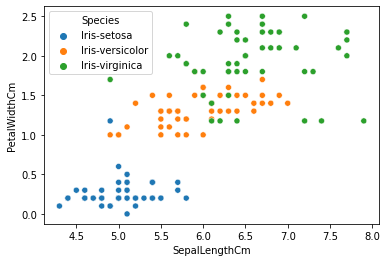

In [4]:
sn.scatterplot(data.SepalLengthCm,data.PetalWidthCm,hue=data.Species)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data.Species)

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.000000,0
1,2,4.9,3.0,1.4,1.176224,0
2,3,4.7,3.2,1.3,0.200000,0
3,4,4.6,3.1,1.5,0.200000,0
4,5,5.0,3.6,1.4,0.200000,0


In [7]:
data['SepalLengthCm'] = data['SepalLengthCm']/data.SepalLengthCm.max()
data['SepalWidthCm'] = data['SepalWidthCm']/data.SepalWidthCm.max()
data['PetalLengthCm'] = data['PetalLengthCm']/data.PetalLengthCm.max()
data['PetalWidthCm'] = data['PetalWidthCm']/data.PetalWidthCm.max()
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.645570,0.795455,0.202899,0.00000,0
1,2,0.620253,0.681818,0.202899,0.47049,0
2,3,0.594937,0.727273,0.188406,0.08000,0
3,4,0.582278,0.704545,0.217391,0.08000,0
4,5,0.632911,0.818182,0.202899,0.08000,0


In [8]:
X = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = data.Species

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 3)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [11]:
predicted = lda.predict(X_test)

In [12]:
truth = y_test

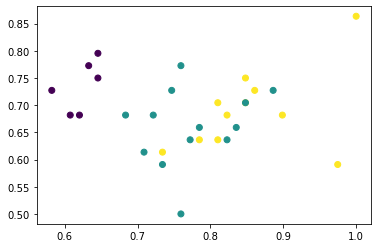

In [13]:
# Actual data clusters
plt.scatter(X_test.SepalLengthCm,X_test.SepalWidthCm,c=truth)

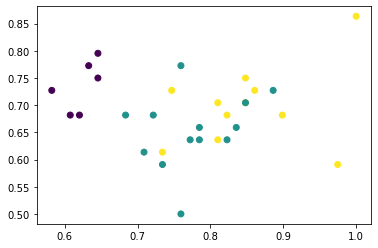

In [14]:
# Clustering using LDA
plt.scatter(X_test.SepalLengthCm,X_test.SepalWidthCm,c=predicted)

In [15]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(truth,predicted)
cm

array([[ 6,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 10]], dtype=int64)

<AxesSubplot:>

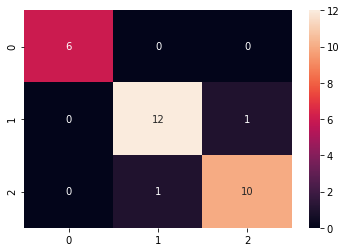

In [16]:
sn.heatmap(cm,annot=True)